In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

11490434/11490434 [==============================] - 28s 2us/step


8


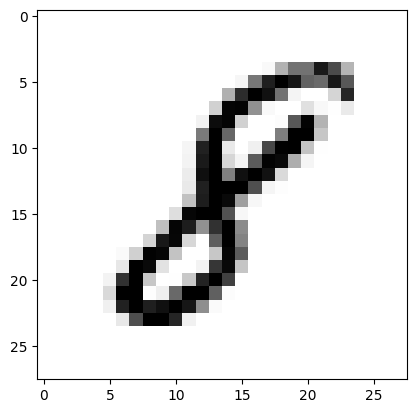

In [7]:
import matplotlib.pyplot as plt
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train =  x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('X_train shape : ', x_train.shape)
print('Number Of Image in x_train', x_train.shape[0])
print('Number Of Image in x_test', x_test.shape[0])

X_train shape :  (60000, 28, 28, 1)
Number Of Image in x_train 60000
Number Of Image in x_test 10000


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2156 - accuracy: 0.9356
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0876 - accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0617 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0470 - accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0373 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0305 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0238 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0207 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0667 - accuracy: 0.9839


[0.06667933613061905, 0.9839000105857849]

1/1 [==============================] - 0s 22ms/step
1


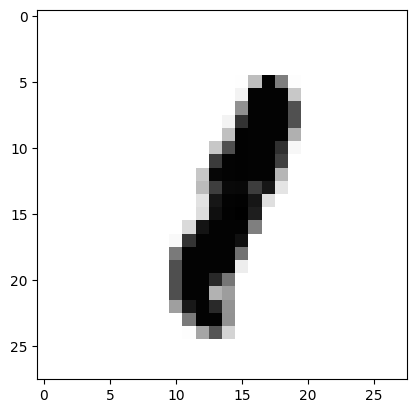

In [17]:
image_index = 190
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())